In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

from utils.dataloader  import FaceDataset, dataAugmentation

### Telechargement et Visualisation de notre jeu de donnée

In [3]:
faceDataset = FaceDataset(dataAugmentation(), is_classification=True)
print(f'Taille du dataset: {len(faceDataset)}')

Taille du dataset: 43266


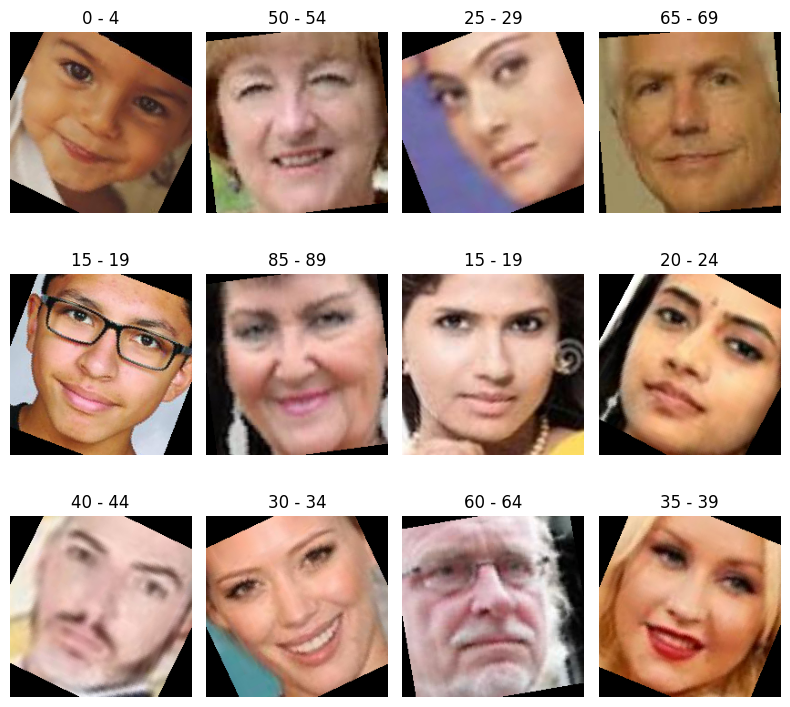

In [57]:
fig, ax = plt.subplots(3, 4, tight_layout=True, figsize=(8, 8))

label_names = faceDataset.get_all_age_range()

for i in range(3):
    for j in range(4):
        rand_idx = np.random.randint(0, len(faceDataset))
        img, label = faceDataset[rand_idx]
        ax[i,j].imshow(torch.permute_copy(img, (1,2,0)))
        ax[i,j].set_title(label_names[label])
        ax[i,j].set_axis_off()
        

##### Visualisation de la distribution des données

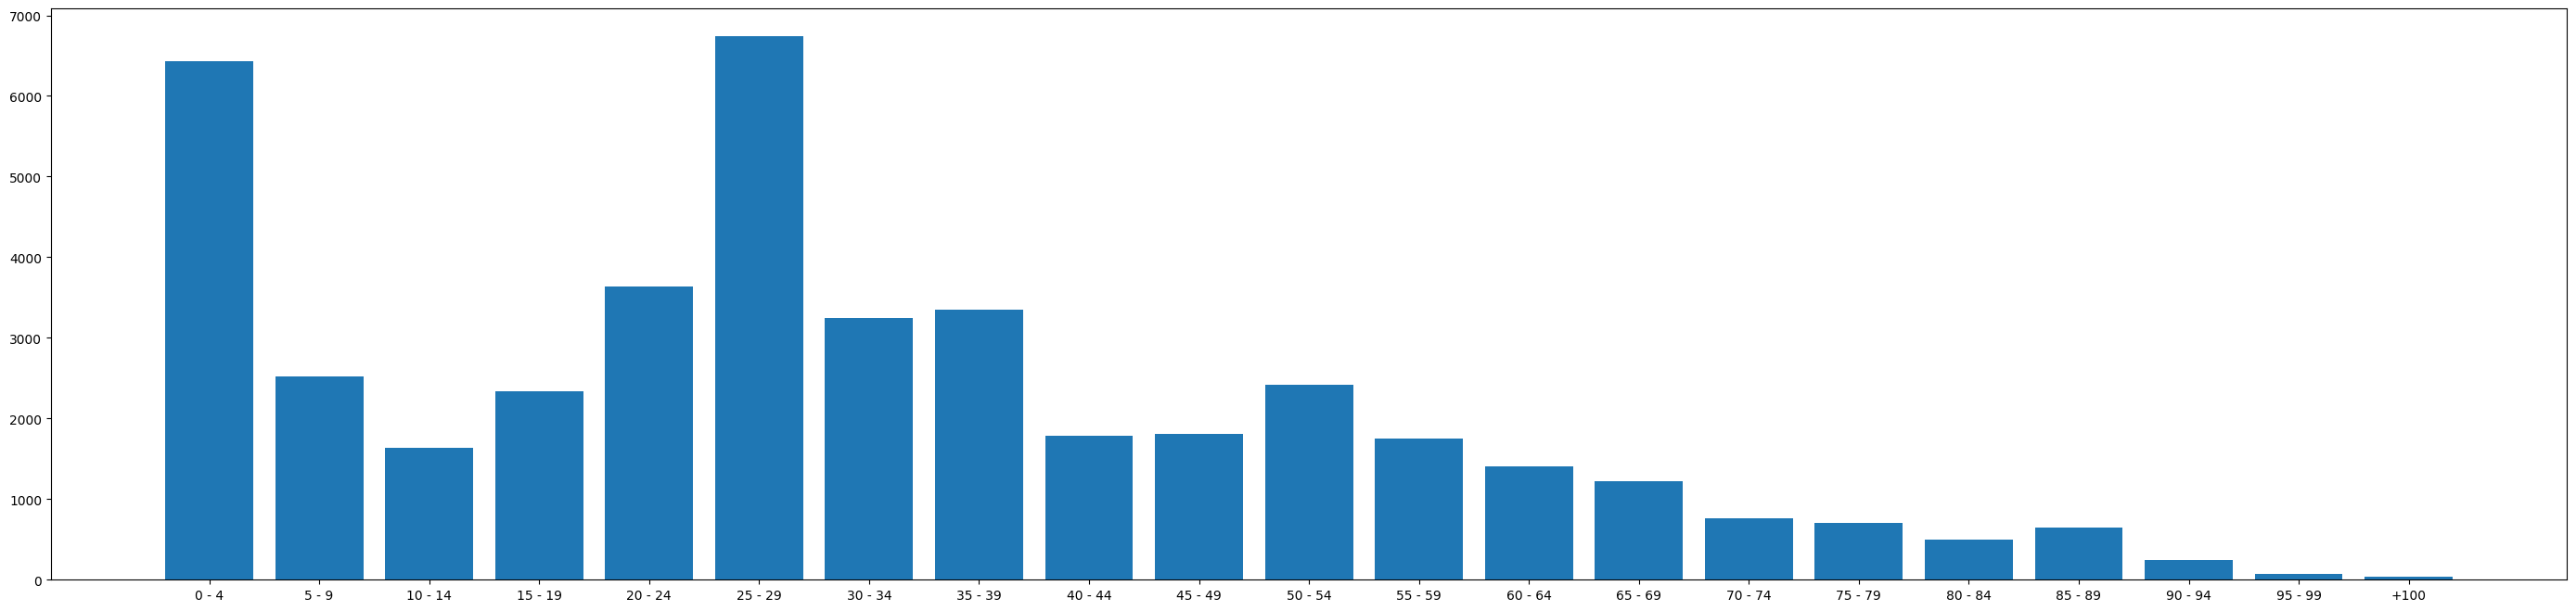

In [59]:
img_by_age_range = faceDataset.img_labels.groupby(['age_range'])['age_range']
df = img_by_age_range.count()

fig, ax = plt.subplots(figsize=(35, 8))
bar_container = ax.bar(label_names.values(), df.values)
